In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import re
from collections import Counter
import matplotlib.pyplot as plt
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)

In [2]:
bills = pd.read_csv('bills_24839_all.csv')

In [3]:
members = pd.read_csv('assembly_memebers_295.csv')

In [4]:
bills.head(10)

,입안일,법안명,법안내용,발의자,상태
0,2020-02-24,출입국관리법 일부개정법률안(정성호의원 등 10인),관광 등 단기체류 목적으로 입국하는 외국인은 출입국관리공무원의 입국심사를 받을 때...,정성호(더불어민주당/鄭成湖) 김민기(더불어민주당/金敏基) 김병관(더불어민주당/金炳官...,계류
1,2020-02-24,통신비밀보호법 일부개정법률안(추혜선의원 등 10인),2018. 8. 30. 헌법재판소는 국가정보원 인터넷회선감청(이른바 ‘패킷감청’)...,추혜선(정의당/秋惠仙) 김종대(정의당/金鍾大) 김종훈(민중당/金鍾勳) 박선숙(바른미...,계류
2,2020-02-24,공익사업을 위한 토지 등의 취득 및 보상에 관한 법률 일부개정법률안(신창현의원 등 ...,"현행 법령상 도시가스 미공급 지역의 경우, 도시가스 사업자가 도시가스 공급을 위해...",신창현(더불어민주당/申昌賢) 김경협(더불어민주당/金炅俠) 김병기(더불어민주당/金炳基...,계류
3,2020-02-24,국회 코로나19 대책 특별위원회 구성의 건(의장),내용없음,의장,계류
4,2020-02-21,군인사법 일부개정법률안(정부),일과 가정의 양립이 가능한 공직문화 조성을 위하여 첫째 자녀에 대하여 부모가 모두 ...,정부,계류
5,2020-02-21,국민권익위원회 위원(박홍규) 추천안(의장),내용없음,의장,계류
6,2020-02-21,중앙선거관리위원회 위원후보자(이승택) 인사청문요청안(대통령),내용없음,기타,계류
7,2020-02-20,중소기업진흥에 관한 법률 일부개정법률안(서영교의원 등 10인),최근 코로나바이러스감염증-19(COVID-19)의 확산으로 직·간접적으로 경제적 ...,서영교(더불어민주당/徐瑛敎) 김상희(더불어민주당/金相姬) 김철민(더불어민주당/金哲玟...,계류
8,2020-02-20,2019년도 국정감사 결과보고서 채택의 건(환경노동위원장),내용없음,위원장,계류
9,2020-02-20,2019년도 환경노동위원회 국정감사 관련 감사원에 대한 감사요구안(환경노동위원장),내용없음,위원장,계류


In [5]:
bills['법안내용'].value_counts()

위원장                                                                                                                                                                                                                                                                                                                                                                                                                                                               1416
정부                                                                                                                                                                                                                                                                                                                                                                                                                                                                1298
기타                                                                                        

In [11]:
members.head(10)

,이름,정당,선거구,당선횟수,소속위원회,학력,주요경력,연락처,이메일,대표발의법안수,위원회 출석률,본회의 출석률,재산
0,강길부 姜吉夫,무소속,울산 울주군,"4선 [ 17대, 18대, 19대, 20대 ]",산업통상자원중소벤처기업위원회,언양농업고등학교/성균관대학교 행정학과/서울대학교환경대학원 도시계획학 석사,6대 건설교통부 차관/한국감정원 원장,의원회관 606호 | 전화 02-784-5073 | 팩스 02-788-0103,shinmut@assembly.go.kr,2,93.65 %,82.88 %,"총계 3,386,959 3,436,703 3,394,464 3,762,663"
1,강병원 姜炳遠,더불어민주당,서울 은평구을,1선,기획재정위원회,서울대학교 농업생명과학대학 농경제학과,서울대학교 총학생회장/노무현대통령 청와대 행정관,의원회관 610호 | 전화 02-784-1422 | 팩스 02-788-0118,kangbw89@gmail.com,14,98.15 %,98.63 %,"총계 662,157 754,761 888,275 989,750"
2,강석진 姜錫振,미래통합당,경남 산청군함양군거창군합천군,1선,농림축산식품해양수산위원회,연세대학교 행정대학원,새누리당 최경환 원내대표 비서실장/경남 거창군수,의원회관 542호 | 전화 02-784-1460 | 팩스 02-788-0119,ksjv7900@naver.com,19,98.36 %,93.84 %,"총계 365,671 472,584 532,440 724,182"
3,강석호 姜碩鎬,미래통합당,경북 영양군영덕군봉화군울진군,"3선 [ 18대, 19대, 20대 ]",농림축산식품해양수산위원회,한국외국어대학교 서양어대학 스페인어과,새누리당 제1사무부총장/경상북도의회 의원/스텔베르그&삼일 대표이사,의원회관 707호 | 전화 02-784-2374 | 팩스 02-788-0105,kangsh@na.go.kr,8,88.46 %,86.99 %,"총계 15,371,209 13,904,477 16,757,244 16,732,344"
4,강창일 姜昌一,더불어민주당,제주 제주시갑,"4선 [ 17대, 18대, 19대, 20대 ]",행정안전위원회,서울대학교 국사학과/도쿄대학교대학원 문학 박사,5.18기념재단 이사/배재대학교 교무처장,의원회관 806호 | 전화 02-784-6084 | 팩스 02-788-0108,kangci@assembly.go.kr,10,83.33 %,90.41 %,"총계 1,618,382 2,111,355 2,257,761 1,866,353"
5,강효상 姜孝祥,미래통합당,비례대표,1선,공공부문 채용비리 의혹과 관련된 국정조사특별위원회,서울대학교 법과대학 사법학과 졸업,TV조선 보도본부장/조선일보 편집국장,의원회관 418호 | 전화 02-784-6195 | 팩스 02-788-0400,hyoshang@gmail.com,12,88.89 %,83.56 %,"총계 2,696,829 2,824,614 3,096,682 3,468,624"
6,강훈식 姜勳植,더불어민주당,충남 아산시을,1선,국토교통위원회,건국대학교 경영정보학과,더불어민주당 아산을 지역위원장/동국대 언론정보대학원 겸임교수,의원회관 640호 | 전화 02-784-1045 | 팩스 02-788-0263,gohoonsik@gmail.com,7,83.33 %,93.84 %,"총계 333,560 209,253 298,004 506,666"
7,경대수 慶大秀,미래통합당,충북 증평군진천군음성군,"2선 [ 19대, 20대 ]",농림축산식품해양수산위원회,경동고등학교/서울대학교/서울대학교 대학원 법학과 석사 수료,새누리당 충북도당 위원장/대검찰청 마약조직범죄부장 검사장/제주지방검찰청 검사장/제2...,의원회관 941호 | 전화 02-784-3977 | 팩스 02-788-0110,kyungds@na.go.kr,7,98.36 %,93.84 %,"총계 681,739 949,726 751,248 862,403"
8,고용진 高榕禛,더불어민주당,서울 노원구갑,1선,국회운영위원회,서울대학교대학원 언론정보학과 석사,서울시의회의원/노무현정부 청와대 행정관/더불어민주당 노원갑 지역위원장,의원회관 1005호 | 전화 02-784-4840 | 팩스 02-788-0171,gogoyongjin@naver.com,4,100.00 %,95.89 %,"총계 632,899 875,972 1,184,064 1,576,501"
9,곽대훈 郭大勳,미래통합당,대구 달서구갑,1선,산업통상자원중소벤처기업위원회,서울대학교 행정대학원 행정학 석사 수료,대구광역시 달서구청장/대구광역시 행정관리국장,의원회관 530호 | 전화 02-784-0790 | 팩스 02-788-0331,dhkwak605@naver.com,4,86.57 %,91.10 %,"총계 1,620,248 1,701,690 1,741,160 1,822,481"


# 한글이름 칼럼 만들어주기

In [5]:
members['한글이름'] = members['이름'].str.split(' ').str[0]

중복값 확인

In [6]:
display(members[members['한글이름'].duplicated()])

,이름,정당,선거구,당선횟수,소속위원회,학력,주요경력,연락처,이메일,대표발의법안수,위원회 출석률,본회의 출석률,재산,한글이름
42,김성태 金聖泰,미래통합당,서울 강서구을,"3선 [ 18대, 19대, 20대 ]",행정안전위원회,진주공업고등학교/강남대학교 법학과/한양대학교행정대학원 행정학 석사,새누리당 서울시당 위원장/한나라당 쇄신모임 '민본21' 간사/한국노총 사무총장,의원회관 910호 | 전화 02-784-3291 | 팩스 02-788-0137,kst0331@assembly.go.kr,3,75.00 %,91.10 %,"총계 1,212,394 1,063,711 1,689,786 1,939,570",김성태


김성태 국회의원이 2명이군요~!

In [7]:
members.loc[members['학력'] == '미국 조지아대학교 대학원 행정학 박사', '한글이름'] = '金成泰'
members.loc[members['학력'] == '진주공업고등학교/강남대학교 법학과/한양대학교행정대학원 행정학 석사', '한글이름'] = '金聖泰'

깔끔하게 바꾸기 성공~!

# 각각 발의한 법안의 개수는 몇 개나 될까?

In [15]:
list_temp = []
for name in tqdm(members['한글이름']):
    list_temp.append(bills[bills['발의자'].str.contains(name, na=False)].shape[0])

100%|██████████| 295/295 [00:04<00:00, 60.90it/s]


In [28]:
sorted(list_temp)

[3,
 76,
 89,
 90,
 103,
 106,
 126,
 143,
 185,
 197,
 201,
 205,
 213,
 215,
 242,
 261,
 279,
 280,
 286,
 290,
 290,
 292,
 303,
 304,
 304,
 304,
 306,
 310,
 310,
 317,
 320,
 336,
 341,
 342,
 346,
 351,
 352,
 360,
 361,
 364,
 364,
 371,
 371,
 375,
 379,
 382,
 383,
 385,
 389,
 394,
 398,
 401,
 403,
 405,
 410,
 415,
 422,
 423,
 425,
 425,
 428,
 430,
 434,
 437,
 438,
 442,
 449,
 451,
 462,
 465,
 468,
 470,
 470,
 479,
 480,
 482,
 483,
 486,
 487,
 490,
 491,
 498,
 499,
 502,
 508,
 511,
 521,
 524,
 525,
 525,
 525,
 531,
 539,
 543,
 544,
 553,
 553,
 554,
 556,
 569,
 571,
 576,
 589,
 602,
 604,
 604,
 605,
 605,
 610,
 612,
 624,
 627,
 630,
 641,
 651,
 652,
 653,
 662,
 668,
 671,
 671,
 672,
 676,
 676,
 677,
 684,
 688,
 690,
 691,
 695,
 700,
 701,
 709,
 712,
 712,
 721,
 722,
 733,
 739,
 747,
 748,
 749,
 750,
 753,
 753,
 755,
 758,
 767,
 770,
 781,
 787,
 793,
 793,
 794,
 795,
 802,
 805,
 819,
 823,
 829,
 830,
 838,
 838,
 845,
 846,
 848,
 852,
 85

의원별로 법안을 많이 낸 사람을 sort한 결과!

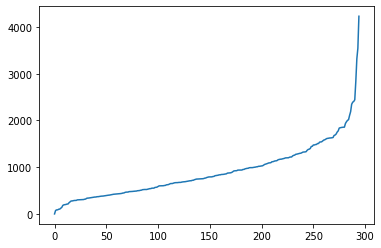

In [25]:
plt.plot(range(len(list_temp)), sorted(list_temp))
plt.show()

# 데이터프레임 좀 만들게요~

In [109]:
members['한글이름'].values

array(['강길부', '강병원', '강석진', '강석호', '강창일', '강효상', '강훈식', '경대수', '고용진',
       '곽대훈', '곽상도', '권미혁', '권성동', '권은희', '권칠승', '금태섭', '기동민', '김경협',
       '김관영', '김광림', '김광수', '김규환', '김기선', '김도읍', '김동철', '김두관', '김명연',
       '김무성', '김민기', '김병관', '김병기', '김병욱', '김부겸', '김삼화', '김상훈', '김상희',
       '김석기', '김선동', '김성식', '김성원', '김성찬', '金成泰', '金聖泰', '김성환', '김세연',
       '김수민', '김순례', '김승희', '김영우', '김영주', '김영진', '김영춘', '김영호', '김용태',
       '김재경', '김재원', '김정우', '김정재', '김정호', '김정훈', '김종대', '김종민', '김종석',
       '김종회', '김경진', '김중로', '김진태', '김진표', '김철민', '김태년', '김태흠', '김학용',
       '김한정', '김한표', '김해영', '김현권', '김현미', '김현아', '나경원', '남인순', '노웅래',
       '도종환', '맹성규', '문진국', '문희상', '민경욱', '민병두', '민홍철', '박경미', '박광온',
       '박대출', '박덕흠', '박맹우', '박명재', '박범계', '박병석', '박선숙', '박성중', '박순자',
       '박영선', '박완수', '박완주', '박용진', '박인숙', '박재호', '박정', '박주민', '박주선',
       '박주현', '박지원', '박찬대', '박홍근', '백승주', '백재현', '백혜련', '변재일', '서삼석',
       '서영교', '서청원', '서형수', '설훈', '성일종', '소병훈', '손금주', '손혜원', '송갑석',
       '송기헌', '송석준', '

In [161]:
pd.DataFrame(columns = members['한글이름'].values).to_csv('excel_sheet_to_start.csv', encoding='cp949')

In [162]:
test = pd.read_csv('excel_sheet_to_start.csv', encoding='cp949')

이렇게 이쁘게 만들어졌지유~~~

In [150]:
test.head()

,Unnamed: 0,강길부,강병원,강석진,강석호,강창일,강효상,강훈식,경대수,고용진,곽대훈,곽상도,권미혁,권성동,권은희,권칠승,금태섭,기동민,김경협,김관영,김광림,김광수,김규환,김기선,김도읍,김동철,김두관,김명연,김무성,김민기,김병관,김병기,김병욱,김부겸,김삼화,김상훈,김상희,김석기,김선동,김성식,김성원,김성찬,金成泰,金聖泰,김성환,김세연,김수민,김순례,김승희,김영우,김영주,김영진,김영춘,김영호,김용태,김재경,김재원,김정우,김정재,김정호,김정훈,김종대,김종민,김종석,김종회,김경진,김중로,김진태,김진표,김철민,김태년,김태흠,김학용,김한정,김한표,김해영,김현권,김현미,김현아,나경원,남인순,노웅래,도종환,맹성규,문진국,문희상,민경욱,민병두,민홍철,박경미,박광온,박대출,박덕흠,박맹우,박명재,박범계,박병석,박선숙,박성중,박순자,박영선,박완수,박완주,박용진,박인숙,박재호,박정,박주민,박주선,박주현,박지원,박찬대,박홍근,백승주,백재현,백혜련,변재일,서삼석,서영교,서청원,서형수,설훈,성일종,소병훈,손금주,손혜원,송갑석,송기헌,송석준,송언석,송영길,송옥주,송희경,신경민,신동근,신보라,신상진,신용현,신창현,심기준,심상정,심재권,심재철,안규백,안민석,안상수,안호영,어기구,여상규,여영국,염동열,오신환,오영훈,오제세,우상호,우원식,원유철,원혜영,위성곤,유기준,유동수,유민봉,유성엽,유승민,유승희,유은혜,유의동,유재중,윤관석,윤상직,윤상현,윤소하,윤영석,윤영일,윤일규,윤재옥,윤종필,윤준호,윤한홍,윤호중,윤후덕,이개호,이규희,이동섭,이만희,이명수,이상돈,이상민,이상헌,이석현,이양수,이언주,이용득,이용주,이용호,이원욱,이은권,이은재,이인영,이장우,이재정,이정미,이정현,이종걸,이종구,이종명,이종배,이주영,이진복,이찬열,이채익,이철규,이철희,이춘석,이태규,이학영,이학재,이해찬,이헌승,이현재,이혜훈,이후삼,이훈,인재근,임이자,임재훈,임종성,장병완,장석춘,장정숙,장제원,전재수,전해철,전현희,전혜숙,전희경,정갑윤,정동영,정병국,정성호,정세균,정양석,정용기,정우택,정운천,정유섭,정은혜,정인화,정재호,정점식,정종섭,정진석,정춘숙,정태옥,제윤경,조경태,조배숙,조승래,조원진,조응천,조정식,조훈현,주광덕,주승용,주호영,지상욱,진선미,진영,채이배,천정배,최경환,최교일,최도자,최연혜,최운열,최인호,최재성,추경호,추미애,추혜선,표창원,하태경,한선교,한정애,함진규,허윤정,홍문종,홍문표,홍영표,홍의락,홍익표,홍일표,홍철호,황주홍,황희,김종훈
0,강길부,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,강병원,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,강석진,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [166]:
test.to_csv('excel_sheet_to_start.csv', encoding='cp949', index=False)

# 그럼 네트워크 분포를 한 번 만들어봅시다

In [37]:
df_main = pd.read_csv('excel_sheet_to_start.csv', encoding='cp949')

In [38]:
names = members['한글이름'].unique()

In [39]:
for name in tqdm(names):
    list_people = []
    temp_df = bills[bills['발의자'].str.contains(name, na=False)]['발의자'].str.split(' ')
    for array in temp_df:
        for person in array:
            list_people.append(person.split('(')[0])
    dict_relation = dict(Counter(list_people).most_common())
    dict_relation[name] = 0
    df_main[name] = df_main['기준!'].map(dict_relation)

100%|██████████| 295/295 [00:08<00:00, 36.59it/s]


In [56]:
df_main.head(50)

,기준!,강길부,강병원,강석진,강석호,강창일,강효상,강훈식,경대수,고용진,곽대훈,곽상도,권미혁,권성동,권은희,권칠승,금태섭,기동민,김경협,김관영,김광림,김광수,김규환,김기선,김도읍,김동철,김두관,김명연,김무성,김민기,김병관,김병기,김병욱,김부겸,김삼화,김상훈,김상희,김석기,김선동,김성식,김성원,김성찬,金成泰,金聖泰,김성환,김세연,김수민,김순례,김승희,김영우,김영주,김영진,김영춘,김영호,김용태,김재경,김재원,김정우,김정재,김정호,김정훈,김종대,김종민,김종석,김종회,김경진,김중로,김진태,김진표,김철민,김태년,김태흠,김학용,김한정,김한표,김해영,김현권,김현미,김현아,나경원,남인순,노웅래,도종환,맹성규,문진국,문희상,민경욱,민병두,민홍철,박경미,박광온,박대출,박덕흠,박맹우,박명재,박범계,박병석,박선숙,박성중,박순자,박영선,박완수,박완주,박용진,박인숙,박재호,박정,박주민,박주선,박주현,박지원,박찬대,박홍근,백승주,백재현,백혜련,변재일,서삼석,서영교,서청원,서형수,설훈,성일종,소병훈,손금주,손혜원,송갑석,송기헌,송석준,송언석,송영길,송옥주,송희경,신경민,신동근,신보라,신상진,신용현,신창현,심기준,심상정,심재권,심재철,안규백,안민석,안상수,안호영,어기구,여상규,여영국,염동열,오신환,오영훈,오제세,우상호,우원식,원유철,원혜영,위성곤,유기준,유동수,유민봉,유성엽,유승민,유승희,유은혜,유의동,유재중,윤관석,윤상직,윤상현,윤소하,윤영석,윤영일,윤일규,윤재옥,윤종필,윤준호,윤한홍,윤호중,윤후덕,이개호,이규희,이동섭,이만희,이명수,이상돈,이상민,이상헌,이석현,이양수,이언주,이용득,이용주,이용호,이원욱,이은권,이은재,이인영,이장우,이재정,이정미,이정현,이종걸,이종구,이종명,이종배,이주영,이진복,이찬열,이채익,이철규,이철희,이춘석,이태규,이학영,이학재,이해찬,이헌승,이현재,이혜훈,이후삼,이훈,인재근,임이자,임재훈,임종성,장병완,장석춘,장정숙,장제원,전재수,전해철,전현희,전혜숙,전희경,정갑윤,정동영,정병국,정성호,정세균,정양석,정용기,정우택,정운천,정유섭,정은혜,정인화,정재호,정점식,정종섭,정진석,정춘숙,정태옥,제윤경,조경태,조배숙,조승래,조원진,조응천,조정식,조훈현,주광덕,주승용,주호영,지상욱,진선미,진영,채이배,천정배,최경환,최교일,최도자,최연혜,최운열,최인호,최재성,추경호,추미애,추혜선,표창원,하태경,한선교,한정애,함진규,허윤정,홍문종,홍문표,홍영표,홍의락,홍익표,홍일표,홍철호,황주홍,황희,김종훈
0,강길부,0.0,20.0,24.0,36.0,8.0,11.0,9.0,29.0,3.0,36.0,19.0,6.0,41.0,8.0,22.0,8.0,3.0,10.0,11.0,32.0,7.0,18.0,23.0,38.0,8.0,13.0,23.0,39.0,4.0,11.0,12.0,4.0,2.0,20.0,28.0,13.0,40.0,25.0,4.0,39.0,30.0,71.0,71.0,3.0,39.0,38.0,22.0,38.0,38.0,7.0,9.0,5.0,2.0,36.0,30.0,7.0,6.0,27.0,6.0,16.0,12.0,9.0,30.0,29.0,16.0,10.0,18.0,3.0,13.0,6.0,26.0,32.0,1.0,25.0,9.0,3.0,1.0,38.0,18.0,6.0,19.0,8.0,NaN,41.0,11.0,26.0,2.0,9.0,4.0,4.0,14.0,57.0,53.0,54.0,6.0,4.0,1.0,45.0,29.0,6.0,19.0,3.0,2.0,47.0,16.0,14.0,6.0,6.0,3.0,8.0,6.0,4.0,18.0,15.0,9.0,9.0,2.0,15.0,14.0,13.0,9.0,50.0,7.0,5.0,14.0,9.0,9.0,24.0,2.0,3.0,19.0,41.0,5.0,8.0,29.0,29.0,12.0,15.0,3.0,7.0,2.0,14.0,13.0,15.0,44.0,6.0,4.0,29.0,NaN,21.0,28.0,6.0,27.0,3.0,7.0,42.0,6.0,8.0,18.0,14.0,26.0,22.0,24.0,13.0,5.0,27.0,22.0,8.0,17.0,15.0,8.0,43.0,18.0,NaN,14.0,39.0,1.0,28.0,8.0,9.0,12.0,6.0,34.0,19.0,48.0,13.0,3.0,21.0,9.0,30.0,13.0,11.0,10.0,5.0,8.0,21.0,30.0,2.0,14.0,3.0,8.0,15.0,4.0,43.0,37.0,37.0,18.0,38.0,31.0,66.0,26.0,12.0,12.0,4.0,7.0,36.0,2.0,19.0,28.0,20.0,1.0,9.0,4.0,27.0,17.0,4.0,8.0,40.0,6.0,36.0,6.0,4.0,4.0,11.0,20.0,64.0,8.0,45.0,17.0,15.0,42.0,22.0,24.0,35.0,40.0,NaN,10.0,4.0,NaN,18.0,16.0,14.0,31.0,4.0,44.0,10.0,9.0,6.0,3.0,6.0,34.0,24.0,6.0,56.0,29.0,2.0,3.0,6.0,5.0,11.0,26.0,15.0,28.0,6.0,16.0,3.0,37.0,6.0,9.0,5.0,45.0,14.0,16.0,44.0,NaN,33.0,41.0,5.0,22.0,3.0,34.0,41.0,22.0,7.0,17.0
1,강병원,20.0,0.0,1.0,2.0,108.0,1.0,299.0,9.0,160.0,2.0,1.0,267.0,5.0,21.0,180.0,98.0,235.0,286.0,86.0,5.0,32.0,2.0,4.0,3.0,28.0,175.0,2.0,4.0,127.0,152.0,215.0,299.0,64.0,54.0,2.0,277.0,1.0,1.0,16.0,4.0,4.0,63.0,63.0,23.0,10.0,31.0,2.0,NaN,10.0,153.0,157.0,93.0,201.0,5.0,5.0,NaN,249.0,2.0,88.0,2.0,57.0,194.0,1.0,46.0,60.0,18.0,NaN,58.0,276.0,95.0,3.0,2.0,148.0,4.0,282.0,181.0,67.0,7.0,3.0,123.0,243.0,104.0,57.0,18.0,105.0,2.0,200.0,142.0,174.0,204.0,1.0,19.0,2.0,5.0,67.0,45.0,36.0,4.0,7.0,84.0,3.0,115.0,187.0,3.0,223.0,359.0,174.0,28.0,21.0,47.0,218.0,195.0,1.0,125.0,233.0,88.0,51.0,258.0,1.0,266.0,179.0,4.0,247.0,26.0,119.0,57.0,200.0,6.0,NaN,113.0,382.0,2.0,132.0,85.0,3.0,1.0,26.0,453.0,117.0,73.0,128.0,2.0,141.0,134.0,7.0,174.0,209.0,2.0,4.0,1.0,4.0,93.0,98.0,47.0,188.0,4.0,156.0,225.0,1.0,241.0,2.0,56.0,3.0,239.0,160.0,3.0,1.0,259.0,2.0,2.0,75.0,2.0,43.0,41.0,2.0,1.0,55.0,2.0,126.0,326.0,96.0,33.0,59.0,1.0,5.0,34.0,38.0,46.0,84.0,5.0,54.0,275.0,21.0,27.0,210.0,2.0,2.0,59.0,2.0,148.0,142.0,2.0,126.0,9.0,1.0,2.0,3.0,2.0,240.0,5.0,4.0,204.0,161.0,19.0,163.0,6.0,56.0,4.0,3.0,6.0,37.0,164.0,106.0,4.0,8.0,241.0,24.0,5.0,42.0,2.0,196.0,145.0,131.0,202.0,6.0,2.0,49.0,8.0,213.0,40.0,7.0,1.0,2.0,6.0,4.0,15.0,44.0,188.0,NaN,3.0,2.0,172.0,15.0,227.0,6.0,39.0,194.0,NaN,62.0,111.0,3.0,2.0,42.0,4.0,3.0,120.0,43.0,63.0,38.0,45.0,2.0,45.0,NaN,179.0,174.0,44.0,5.0,93.0,85.0,130.0,19.0,4.0,271.0,5.0,NaN,2.0,18.0,122.0,77.0,90.0,5.0,6.0,87.0,128.0,60.0
2,

In [196]:
df_main.to_csv('members_relation.csv', encoding='cp949')

# 의원님들 정보 정리하기!

In [6]:
temp = members[['한글이름', '정당']]

In [7]:
temp.to_csv('의원님이름, 정당이름.csv', index=False, encoding='cp949')

# 아웃라이어 의원님들 특징 찾아보기

![](https://github.com/hw79chopin/Lecture_DataMining/blob/master/data/%EA%B7%B8%EB%9E%98%ED%94%84_%ED%97%88%EC%9C%A4%EC%A0%95%EC%9D%98%EC%9B%90%20%EC%A0%9C%EC%99%B8.png?raw=true)

### 전체 몰려있는 군집에서 멀리 떨어진 아웃라이어들이 보인다! 저 사람들은 누구일까!?!  
e.g 허윤정 의원, 정점식 의원, 여영국 의원, 정은혜 의원, 김성환 의원, 조원진 의원, 이정현 의원, 서청원 의원, 임재훈 의원, 강길부 의원

In [19]:
sum(list_temp) / len(list_temp)

899.8271186440678

평균 의원 1명당 내는 법안은 약 900개

In [30]:
bills[bills['발의자'].str.contains('허윤정', na=False)]

,입안일,법안명,법안내용,발의자,상태
16,2020-02-17,아동복지법 일부개정법률안(민병두의원 등 12인),최근 유엔 아동권리위원회는 대한민국의 제5·6차 국가보고서에 대한 최종 견해로서 ...,민병두(더불어민주당/閔丙두) 김경협(더불어민주당/金炅俠) 김영춘(더불어민주당/金榮春...,계류
49,2020-02-06,감염병의 예방 및 관리에 관한 법률 일부개정법률안(허윤정의원 등 12인),최근 신종 코로나바이러스 감염병과 관련하여 의료기관은 중국 입국자 및 접촉자 관련...,허윤정(더불어민주당/許允貞) 기동민(더불어민주당/奇東旻) 김상희(더불어민주당/金相姬...,계류
51,2020-02-06,감염병의 예방 및 관리에 관한 법률 일부개정법률안(기동민의원 등 18인),세계적으로 신종감염병의 수가 지난 60년간 4배 이상 늘어나면서 감염병 유행이 전...,기동민(더불어민주당/奇東旻) 강훈식(더불어민주당/姜勳植) 금태섭(더불어민주당/琴泰燮...,계류


In [14]:
bills[bills['발의자'].str.contains('허윤정', na=False)].shape[0]

3

In [12]:
bills[bills['발의자'].str.contains('정점식', na=False)].shape[0]

89

In [34]:
bills[bills['발의자'].str.contains('여영국', na=False)].shape[0]

90

In [36]:
bills[bills['발의자'].str.contains('정은혜', na=False)].shape[0]

103

In [35]:
bills[bills['발의자'].str.contains('김성환', na=False)].shape[0]

106

In [11]:
bills[bills['발의자'].str.contains('조원진', na=False)].shape[0]

143

In [10]:
bills[bills['발의자'].str.contains('이정현', na=False)].shape[0]

197

In [13]:
bills[bills['발의자'].str.contains('서청원', na=False)].shape[0]

280

In [9]:
bills[bills['발의자'].str.contains('임재훈', na=False)].shape[0]

286

In [8]:
bills[bills['발의자'].str.contains('강길부', na=False)].shape[0]

317

아웃라이어 의원님들은 평균 발의법안이 144개였다!  
발의한 법안이 적어서 커뮤니티에 포함되지 못하고 밖으로 분류된 것을 볼 수 있다!

### 후기
- 동명이인이 나오면 힘들다. 그래서 한자이름으로 의원님들 네트워크를 알아보려고 했는데 한자인코딩에 실패...
- 아시는 분께서 도움을 주시면 매우 감사한 부분